In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv("campaign - campaign.csv")

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,IND


In [4]:
df.shape

(2239, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2239 non-null   int64 
 1   Year_Birth           2239 non-null   int64 
 2   Education            2239 non-null   object
 3   Marital_Status       2239 non-null   object
 4   Income               2239 non-null   object
 5   Kidhome              2239 non-null   int64 
 6   Teenhome             2239 non-null   int64 
 7   Dt_Customer          2239 non-null   object
 8   Recency              2239 non-null   int64 
 9   MntWines             2239 non-null   int64 
 10  MntFruits            2239 non-null   int64 
 11  MntMeatProducts      2239 non-null   int64 
 12  MntFishProducts      2239 non-null   int64 
 13  MntSweetProducts     2239 non-null   int64 
 14  MntGoldProds         2239 non-null   int64 
 15  NumDealsPurchases    2239 non-null   int64 
 16  NumWeb

In [6]:
# Percentage of missing values
df.isna().sum()*100/len(df)

,0
ID,0.0
Year_Birth,0.0
Education,0.0
Marital_Status,0.0
Income,0.0
Kidhome,0.0
Teenhome,0.0
Dt_Customer,0.0
Recency,0.0
MntWines,0.0


In [7]:
# Cleaning Income Column
df['Income']=df['Income'].str.replace("$","").str.replace(",","").astype("float")

In [8]:
df['Income'].isna().sum()

24

In [9]:
# Getting some missing values in Income column after cleaning it
# Filling missing values with the median of the column

df['Income']=df['Income'].fillna(df['Income'].median())

In [10]:
df['Income'].isna().sum()

0

In [11]:
# Converting Dt_Customer from object to pandas datetime object
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [12]:
# Creating "Age" column which is the age of the customer
df['Age']=df['Dt_Customer'].dt.year.max() - df['Year_Birth']

In [13]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [14]:
# Define the mapping for 'Marital_Status'
status_mapping = {
    'Married': 'In couple',
    'Together': 'In couple',
    'Divorced': 'Alone',
    'Single': 'Alone',
    'Absurd': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone'
}

# Apply the mapping to the 'Marital_Status' column
df['Marital_Status'] = df['Marital_Status'].replace(status_mapping)


In [15]:
df['Marital_Status'].unique()

array(['Alone', 'In couple'], dtype=object)

In [16]:
# Creating income brackets based on the median income
median_income = df['Income'].median()

df['Income_Bracket'] = df['Income'].apply(lambda x: 'Below Median' if x < median_income else 'Above Median')

In [17]:
# Creating a new column for total spending across all categories
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [18]:
# Checking if the customer has accepted any campaign (True/False)
df['EverAcceptedCampaign'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']] == 1).any(axis=1)

# Converting True/False to 'Yes'/'No'
df['EverAcceptedCampaign'] = df['EverAcceptedCampaign'].apply(lambda x: 'Yes' if x else 'No')


df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Age,Income_Bracket,Total_Spending,EverAcceptedCampaign
0,1826,1970,Graduation,Alone,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,0,SP,44,Above Median,1190,No
1,1,1961,Graduation,Alone,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,0,CA,53,Above Median,577,Yes
2,10476,1958,Graduation,In couple,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,US,56,Above Median,251,No
3,1386,1967,Graduation,In couple,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,AUS,47,Below Median,11,No
4,5371,1989,Graduation,Alone,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,0,SP,25,Below Median,91,Yes


In [19]:
# Statistical summary of numerical columns
df.describe(include=np.number)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Total_Spending
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,1968.802144,51963.463600,0.443948,0.506476,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,45.197856,606.041090
std,3246.372471,11.985494,21410.674611,0.538390,0.544555,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,11.985494,602.274089
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000
25%,2827.500000,1959.000000,35533.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,69.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,396.000000
75%,8423.500000,1977.000000,68277.500000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1046.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,2525.000000


In [20]:
# Statistical summary of categorical columns
df.describe(include='object')

,Education,Marital_Status,Country,Income_Bracket,EverAcceptedCampaign
count,2239,2239,2239,2239,2239
unique,5,2,8,2,2
top,Graduation,In couple,SP,Above Median,No
freq,1126,1443,1095,1132,1776


In [21]:
# Statistical summary of all columns
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Country,Age,Income_Bracket,Total_Spending,EverAcceptedCampaign
count,2239.000000,2239.000000,2239,2239,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239,2239.000000,2239,2239.000000,2239
unique,NaN,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,2,NaN,2
top,NaN,NaN,Graduation,In couple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,NaN,Above Median,NaN,No
freq,NaN,NaN,1126,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095,NaN,1132,NaN,1776
mean,5590.444841,1968.802144,NaN,NaN,51963.463600,0.443948,0.506476,2013-07-10 10:26:25.350603008,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,NaN,45.197856,NaN,606.041090,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,18.000000,NaN,5.000000,NaN
25%,2827.500000,1959.000000,NaN,NaN,35533.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,37.000000,NaN,69.000000,NaN
50%,5455.000000,1970.000000,NaN,NaN,51373.000000,0.000000,0.000000,2013-07-09 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,44.000000,NaN,396.000000,NaN
75%,8423.500000,1977.000000,NaN,NaN,68277.500000,1.000000,1.000000,2013-12-30 12:00:00,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,55.000000,NaN,1046.000000,NaN
max,11191.000000,1996.000000,NaN,NaN,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,121.000000,NaN,2525.000000,NaN


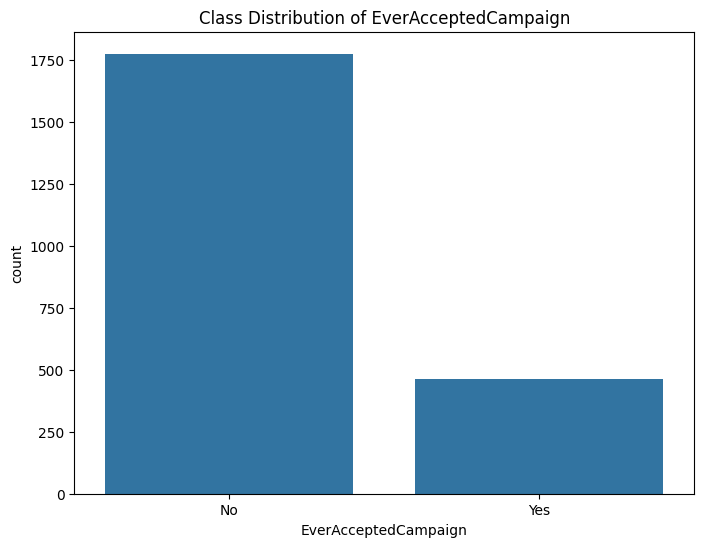


Class Distribution (%):
EverAcceptedCampaign
No     79.321126
Yes    20.678874
Name: proportion, dtype: float64


In [22]:
# Plotting the distribution of the 'EverAcceptedCampaign' class
plt.figure(figsize=(8, 6))
plt.title("Class Distribution of EverAcceptedCampaign")
sns.countplot(data=df, x='EverAcceptedCampaign')
plt.show()

print()

# Display the percentage distribution of each class in the 'EverAcceptedCampaign' column
campaign_distribution = df['EverAcceptedCampaign'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(campaign_distribution)

Observation: About 79% of customers have not accepted the campaign, and 21% have accepted it.

In [23]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

# Univariate Analysis

In [24]:
# Continuous columns
continuous_columns = ['Income', 'Recency','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                       'NumWebVisitsMonth', 'NumDealsPurchases','MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'Total_Spending', 'Age']

# Categorical columns
categorical_columns = ['Kidhome', 'Teenhome', 'Education', 'Marital_Status','Country',
                       'Complain', 'Income_Bracket',
                       'EverAcceptedCampaign']

In [25]:
# Statistical summaries for each numerical column
for col in continuous_columns:
    stats = df[col].describe()
    median = df[col].median()

    print(f"Statistical Summary for {col}:")
    print(stats)
    print("\n")

Statistical Summary for Income:
count      2239.000000
mean      51963.463600
std       21410.674611
min        1730.000000
25%       35533.500000
50%       51373.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64


Statistical Summary for Recency:
count    2239.000000
mean       49.121036
std        28.963662
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


Statistical Summary for NumWebPurchases:
count    2239.000000
mean        4.085306
std         2.779240
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


Statistical Summary for NumCatalogPurchases:
count    2239.000000
mean        2.662796
std         2.923542
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


Statistical Su

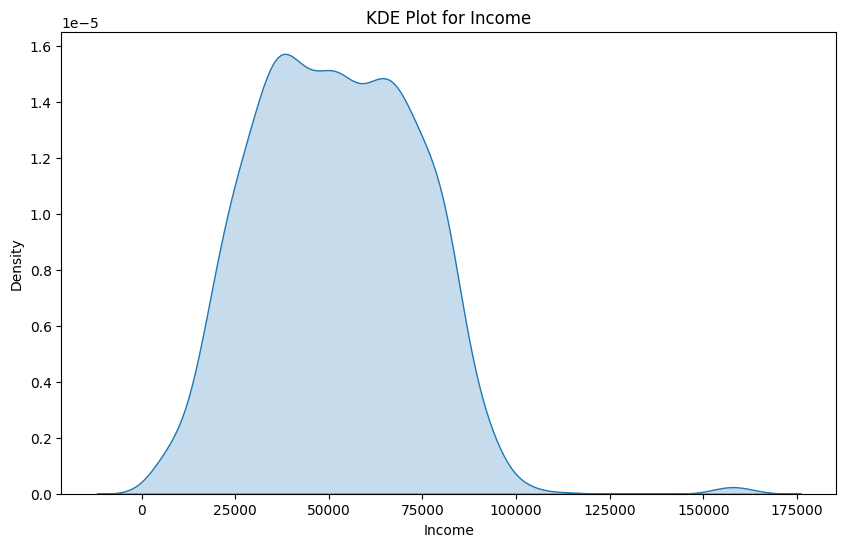

KDE Plot Analysis for Income:
Skewness Value: 0.3498819618565872
Skewness Type: Right Skewed
The Median Value is 51373.0




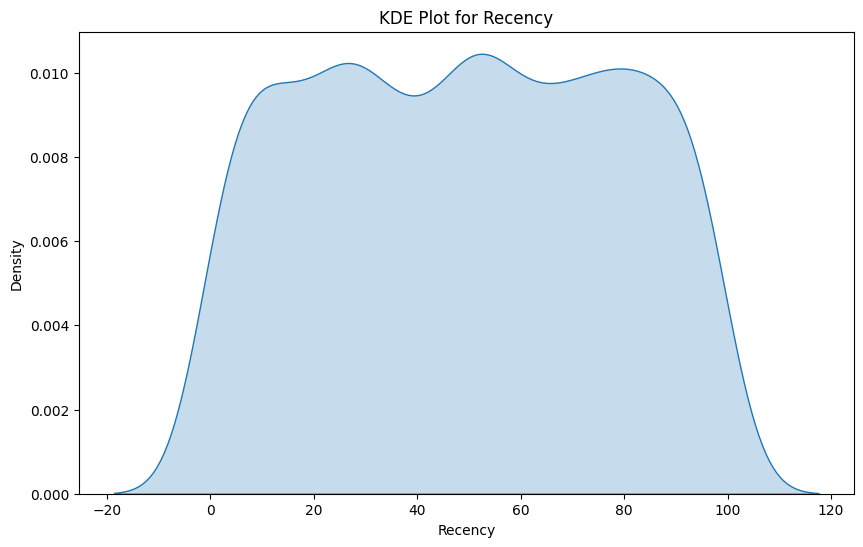

KDE Plot Analysis for Recency:
Skewness Value: -0.0028666880690531873
Skewness Type: Left Skewed
The Median Value is 49.0




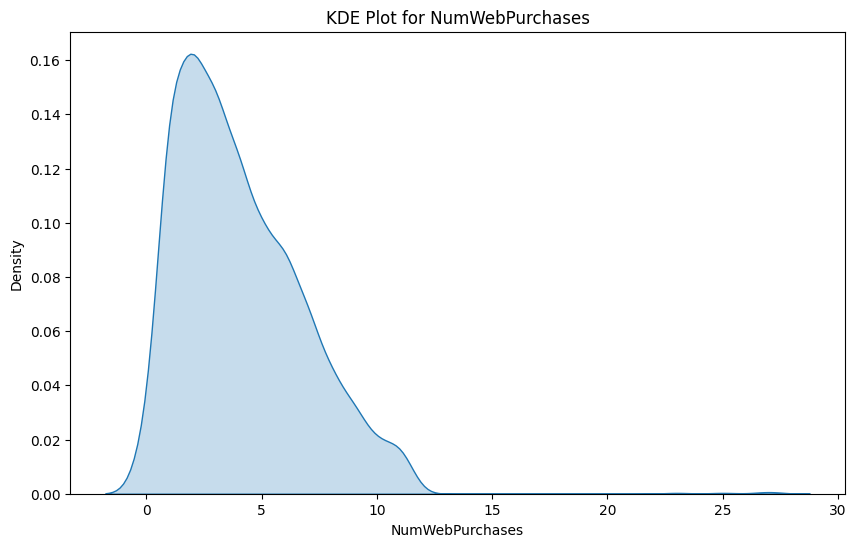

KDE Plot Analysis for NumWebPurchases:
Skewness Value: 1.3812042686431214
Skewness Type: Right Skewed
The Median Value is 4.0




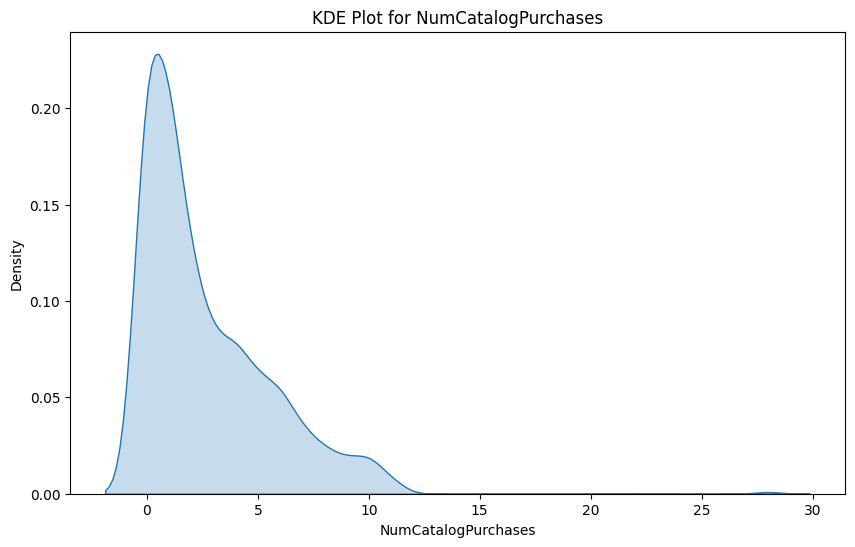

KDE Plot Analysis for NumCatalogPurchases:
Skewness Value: 1.8790368354693385
Skewness Type: Right Skewed
The Median Value is 2.0




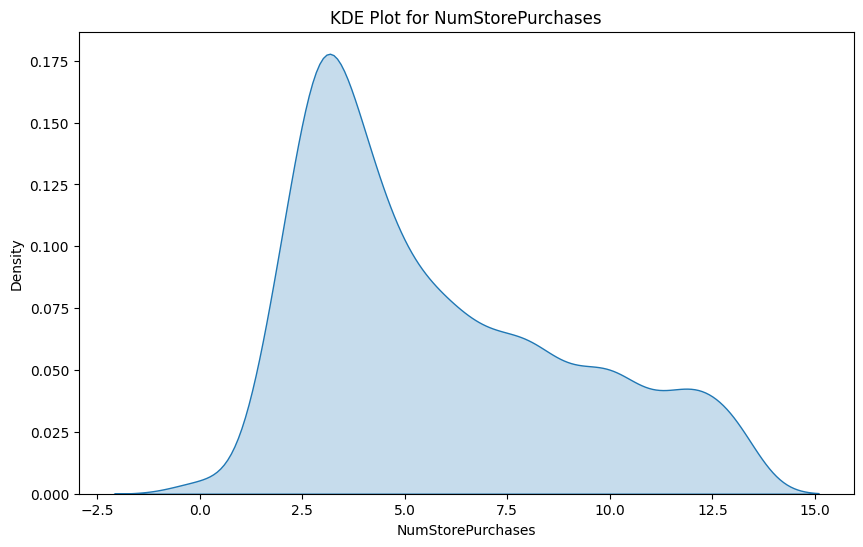

KDE Plot Analysis for NumStorePurchases:
Skewness Value: 0.7010891625892819
Skewness Type: Right Skewed
The Median Value is 5.0




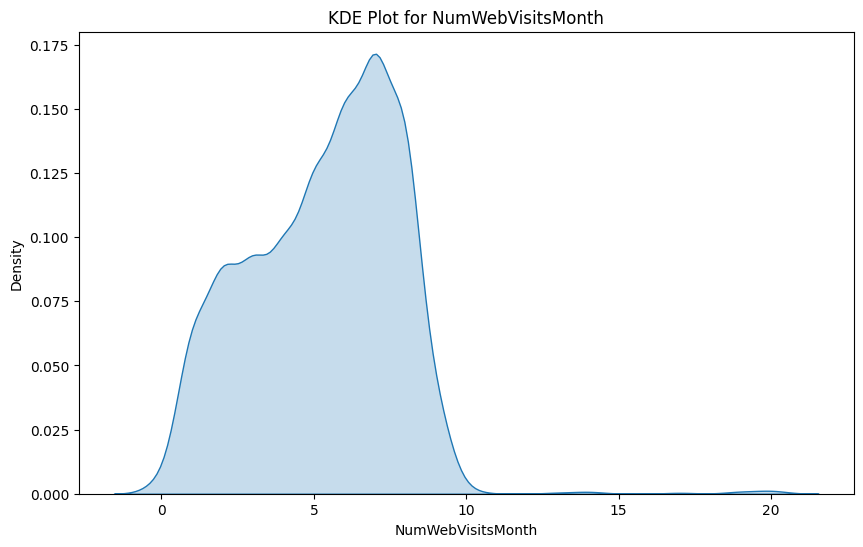

KDE Plot Analysis for NumWebVisitsMonth:
Skewness Value: 0.20811836978875195
Skewness Type: Right Skewed
The Median Value is 6.0




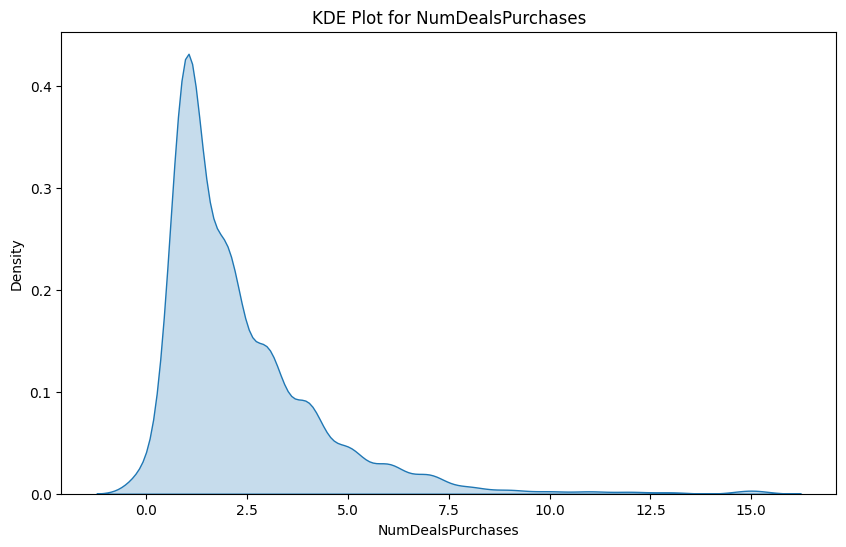

KDE Plot Analysis for NumDealsPurchases:
Skewness Value: 2.418498127990423
Skewness Type: Right Skewed
The Median Value is 2.0




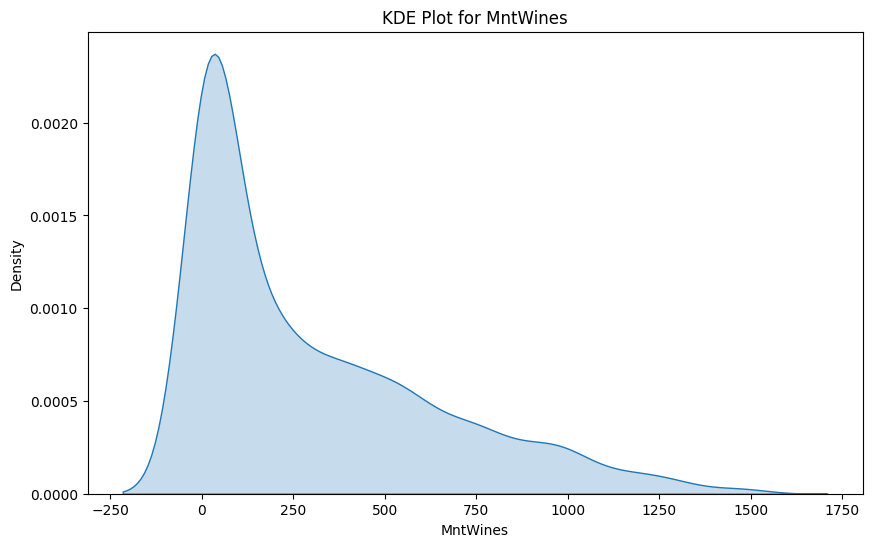

KDE Plot Analysis for MntWines:
Skewness Value: 1.1744519087420455
Skewness Type: Right Skewed
The Median Value is 174.0




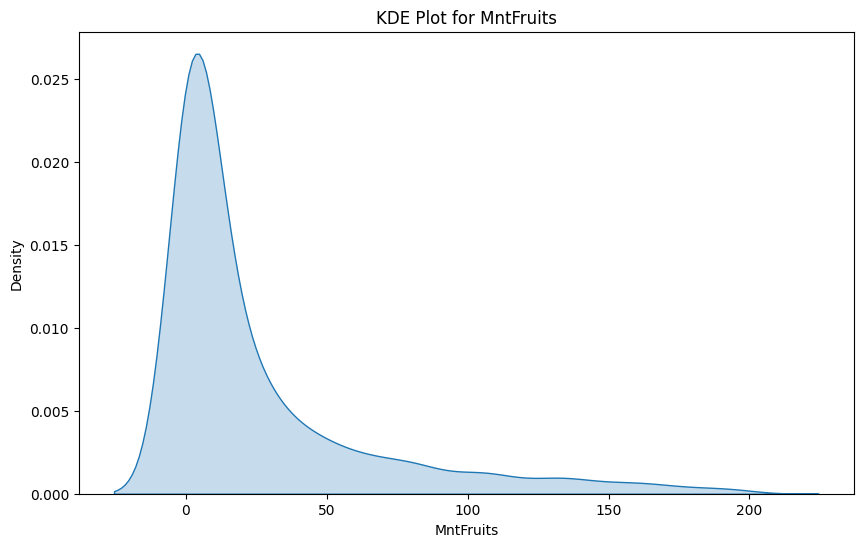

KDE Plot Analysis for MntFruits:
Skewness Value: 2.099919911554825
Skewness Type: Right Skewed
The Median Value is 8.0




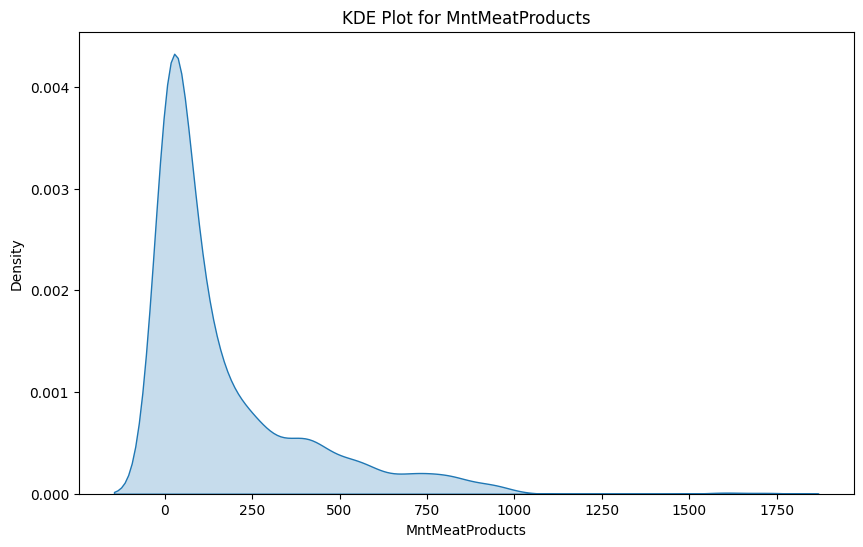

KDE Plot Analysis for MntMeatProducts:
Skewness Value: 2.0812248280567918
Skewness Type: Right Skewed
The Median Value is 67.0




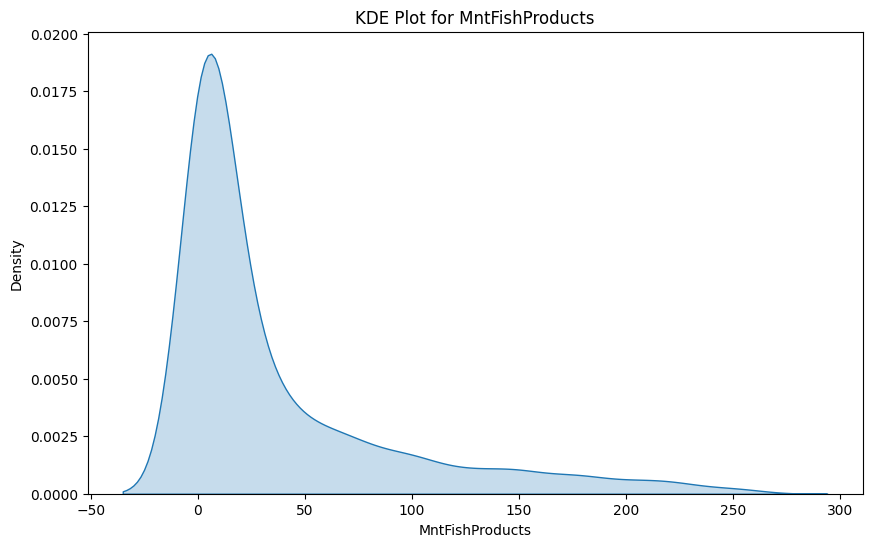

KDE Plot Analysis for MntFishProducts:
Skewness Value: 1.9177767865342714
Skewness Type: Right Skewed
The Median Value is 12.0




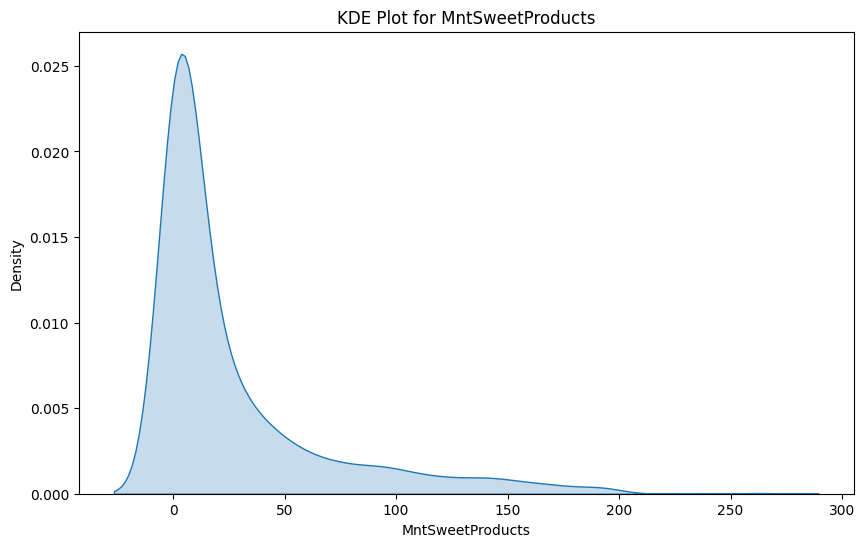

KDE Plot Analysis for MntSweetProducts:
Skewness Value: 2.134010218671234
Skewness Type: Right Skewed
The Median Value is 8.0




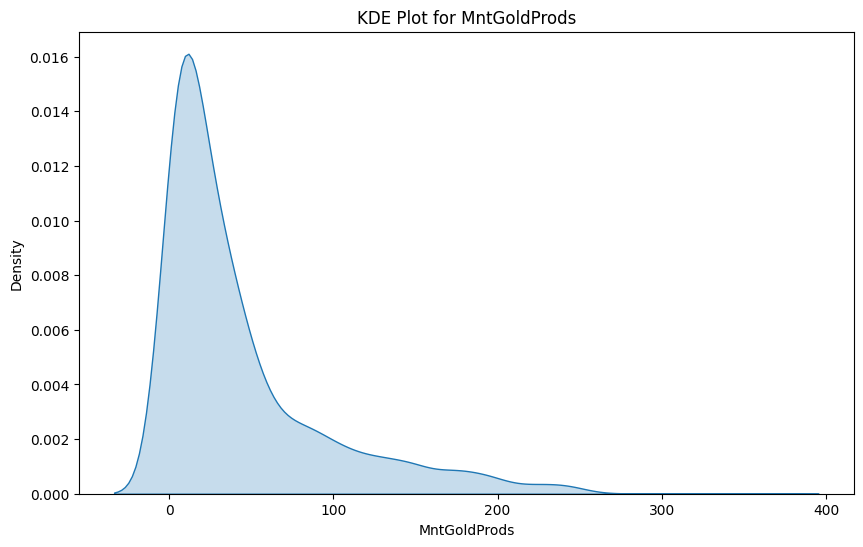

KDE Plot Analysis for MntGoldProds:
Skewness Value: 1.8841783678119086
Skewness Type: Right Skewed
The Median Value is 24.0




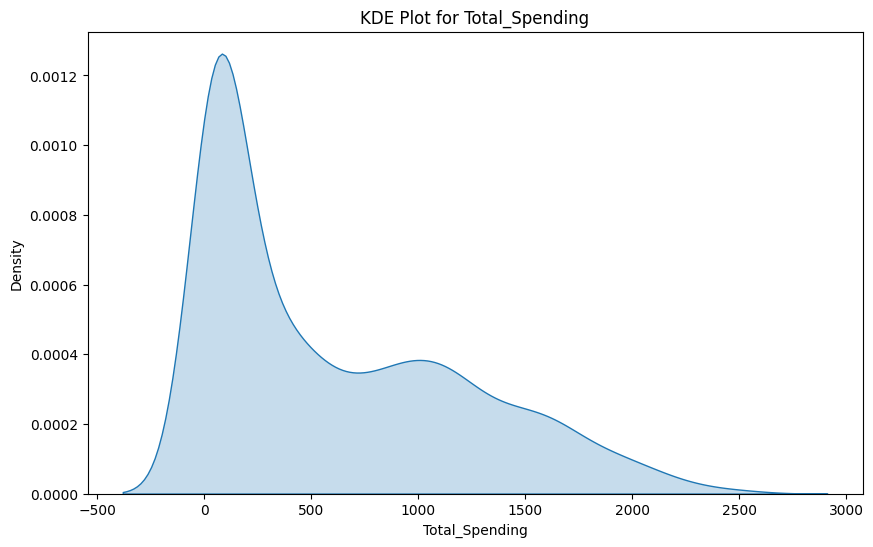

KDE Plot Analysis for Total_Spending:
Skewness Value: 0.8596610200949166
Skewness Type: Right Skewed
The Median Value is 396.0




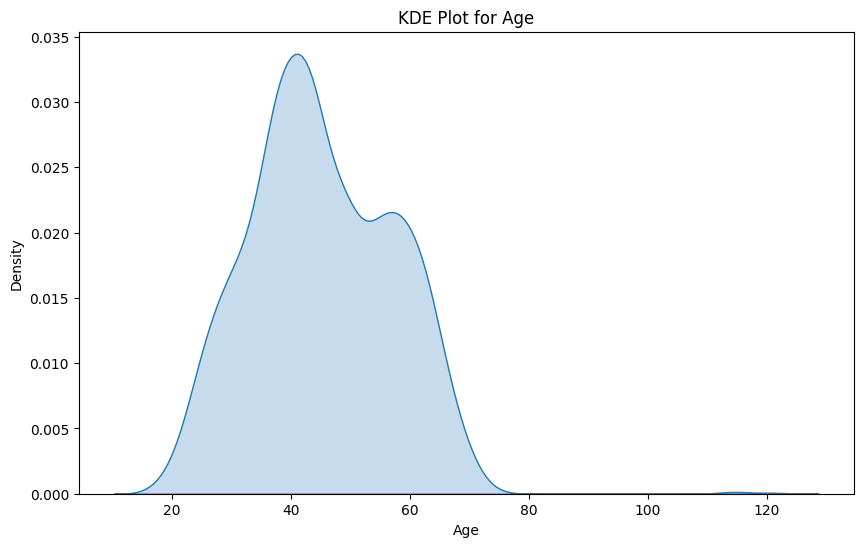

KDE Plot Analysis for Age:
Skewness Value: 0.34896756474838914
Skewness Type: Right Skewed
The Median Value is 44.0




In [26]:
from scipy.stats import skew

# Ploting KDE and analyze skewness
for col in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

    # Calculating skewness
    column_skewness = skew(df[col])


    # Determining skewness type
    if column_skewness > 0:
        skew_type = 'Right Skewed'
    elif column_skewness < 0:
        skew_type = 'Left Skewed'
    else:
        skew_type = 'Normal'

    # Finding the Median
    median = df[col].median()

    # Printing skewness value, skewness type, and median
    print(f"KDE Plot Analysis for {col}:")
    print(f"Skewness Value: {column_skewness}")
    print(f"Skewness Type: {skew_type}")
    print(f"The Median Value is {median}")
    print("\n")

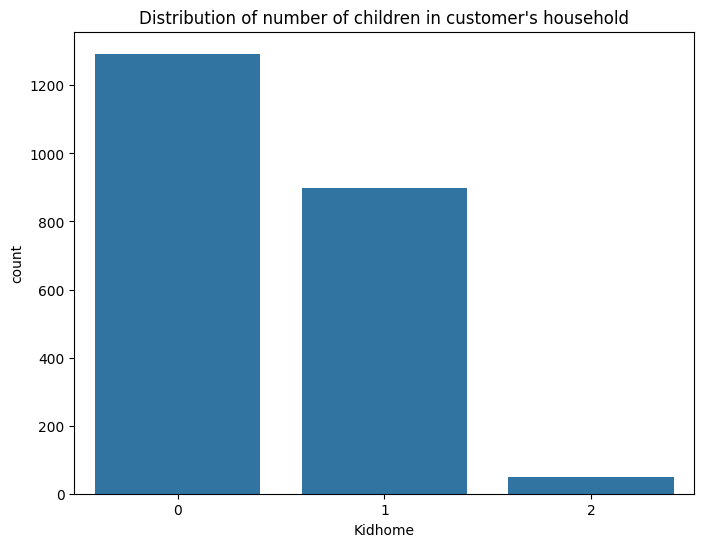

Normalized value counts for 'Kidhome' column:
Kidhome
0    57.748995
1    40.107191
2     2.143814
Name: proportion, dtype: float64


In [27]:
# Count plot for the 'Kidhome' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Kidhome')
plt.title("Distribution of number of children in customer's household")
plt.show()

# Displaying the normalized value counts for the 'Kidhome' column
print("Normalized value counts for 'Kidhome' column:")
print(df['Kidhome'].value_counts(normalize=True) * 100)

Observation: About 57.75% of customers have no children, 40.11% have one child, and 2.14% have two children

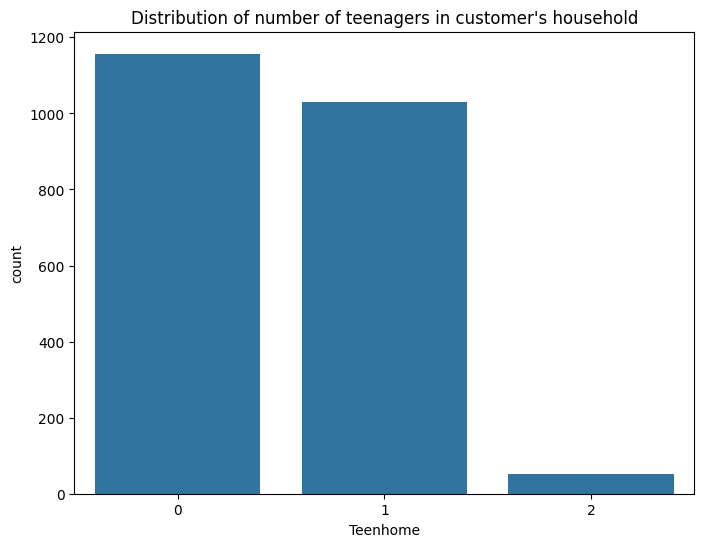

Normalized value counts for 'Teenhome' column:
Teenhome
0    51.674855
1    46.002680
2     2.322465
Name: proportion, dtype: float64


In [28]:
# Count plot for the 'Teenhome' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Teenhome')
plt.title("Distribution of number of teenagers in customer's household")
plt.show()

# Displaying the normalized value counts for the 'Teenhome' column
print("Normalized value counts for 'Teenhome' column:")
print(df['Teenhome'].value_counts(normalize=True) * 100)

Observation: About 51.67% of customers have no teenagers at home, 46.00% have one teenager, and 2.32% have two teenagers

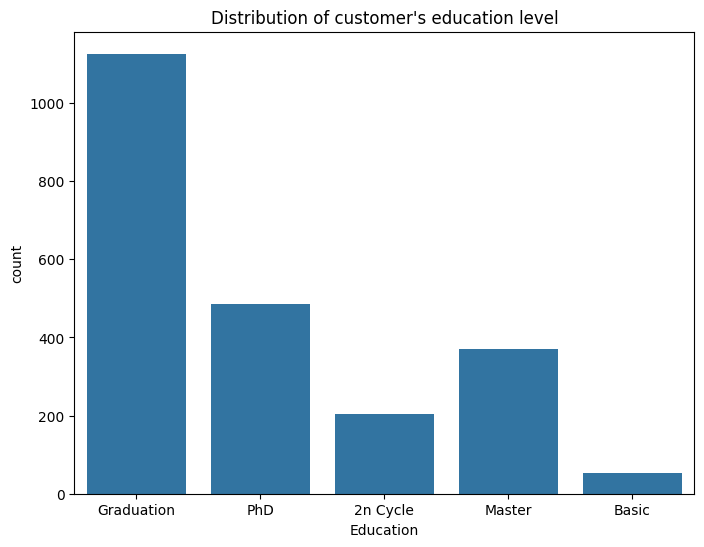

Normalized value counts for 'Education' column:
Education
Graduation    50.290308
PhD           21.706119
Master        16.525234
2n Cycle       9.066548
Basic          2.411791
Name: proportion, dtype: float64


In [29]:
# Count plot for the 'Education' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education')
plt.title("Distribution of customer's education level")
plt.show()

# Displaying the normalized value counts for the 'Education' column
print("Normalized value counts for 'Education' column:")
print(df['Education'].value_counts(normalize=True) * 100)

Observation:
About 50.29% of customers have a Graduation degree, 21.71% hold a PhD, 16.53% have a Master's degree, 9.07% have a 2nd Cycle (Diploma), and 2.41% have only a Basic education

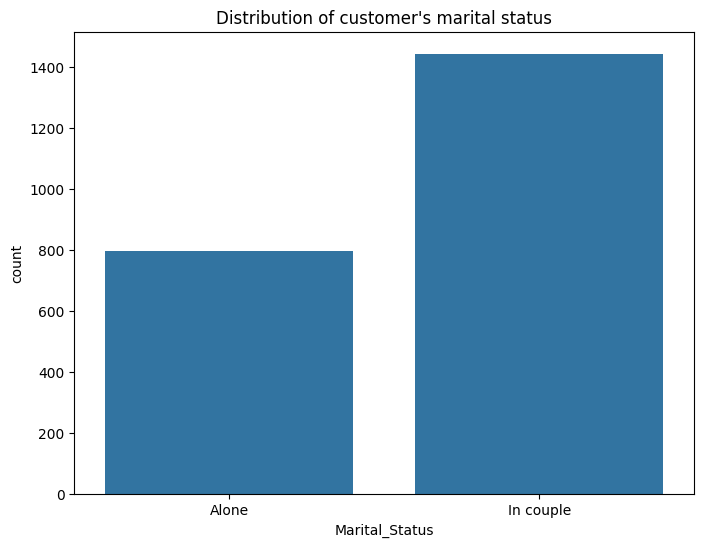

Normalized value counts for 'Marital_Status' column:
Marital_Status
In couple    64.448414
Alone        35.551586
Name: proportion, dtype: float64


In [30]:
# Count plot for the 'Marital_Status' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital_Status')
plt.title("Distribution of customer's marital status")
plt.show()

# Displaying the normalized value counts for the 'Marital_Status' column
print("Normalized value counts for 'Marital_Status' column:")
print(df['Marital_Status'].value_counts(normalize=True) * 100)

Observation: About 64.45% of customers are in a couple, while 35.55% are single

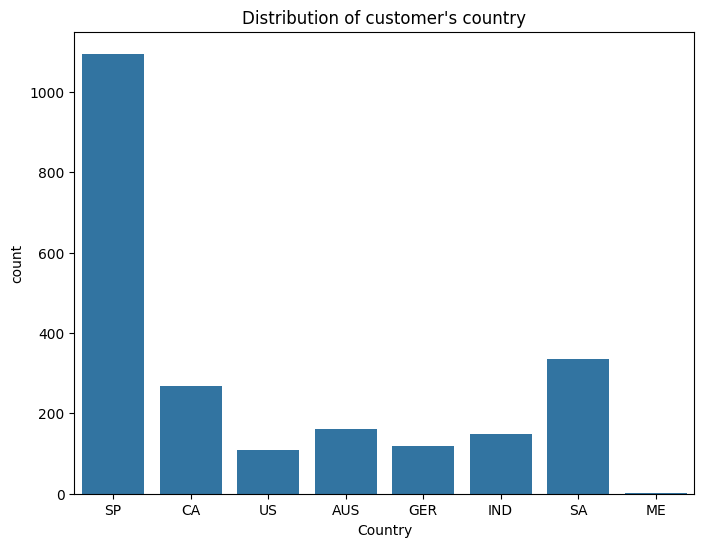

Normalized value counts for 'Country' column:
Country
SP     48.905762
SA     15.006699
CA     11.969629
AUS     7.146047
IND     6.610094
GER     5.359536
US      4.868245
ME      0.133988
Name: proportion, dtype: float64


In [31]:
# Count plot for the 'Country' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Country')
plt.title("Distribution of customer's country")
plt.show()

# Displaying the normalized value counts for the 'Country' column
print("Normalized value counts for 'Country' column:")
print(df['Country'].value_counts(normalize=True) * 100)

Observation: The highest proportion of customers are from Spain (48.91%), while the lowest proportion are from Montenegro (0.13%).

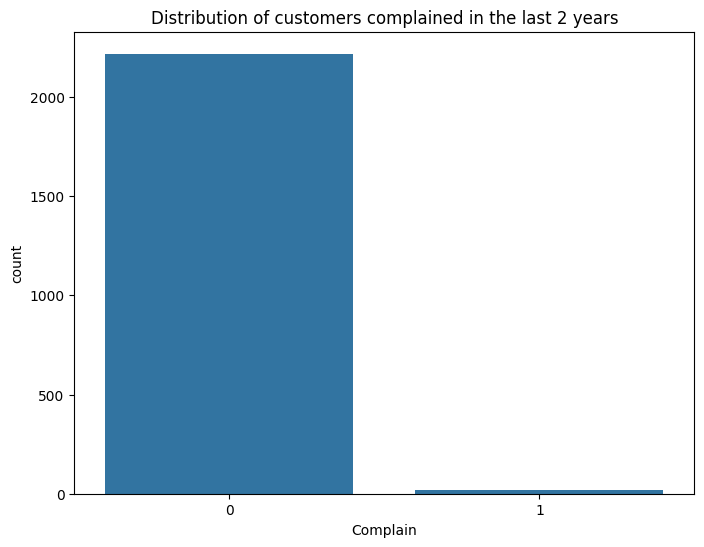

Normalized value counts for 'Complain' column:
Complain
0    99.062081
1     0.937919
Name: proportion, dtype: float64


In [32]:
# Count plot for the 'Complain' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Complain')
plt.title("Distribution of customers complained in the last 2 years")
plt.show()

# Displaying the normalized value counts for the 'Complain' column
print("Normalized value counts for 'Complain' column:")
print(df['Complain'].value_counts(normalize=True) * 100)

Observation: Majority of the customers (99.1%) have not complained in the last 2 years.

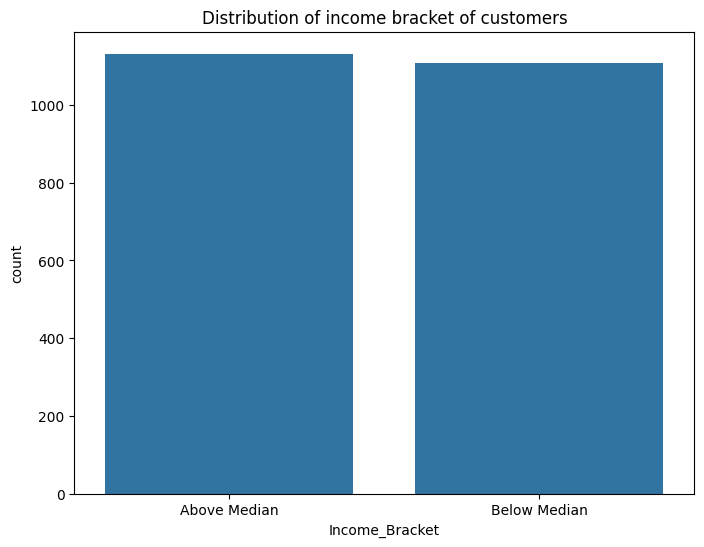

Normalized value counts for 'Income_Bracket' column:
Income_Bracket
Above Median    50.558285
Below Median    49.441715
Name: proportion, dtype: float64


In [33]:
# Count plot for the 'Income_Bracket' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income_Bracket')
plt.title("Distribution of income bracket of customers")
plt.show()

# Displaying the normalized value counts for the 'Income_Bracket' column
print("Normalized value counts for 'Income_Bracket' column:")
print(df['Income_Bracket'].value_counts(normalize=True) * 100)

Observation:
About 50.56% of customers are in the Above Median income bracket, while 49.44% are in the Below Median income bracket, indicating there is not much difference between the two brackets

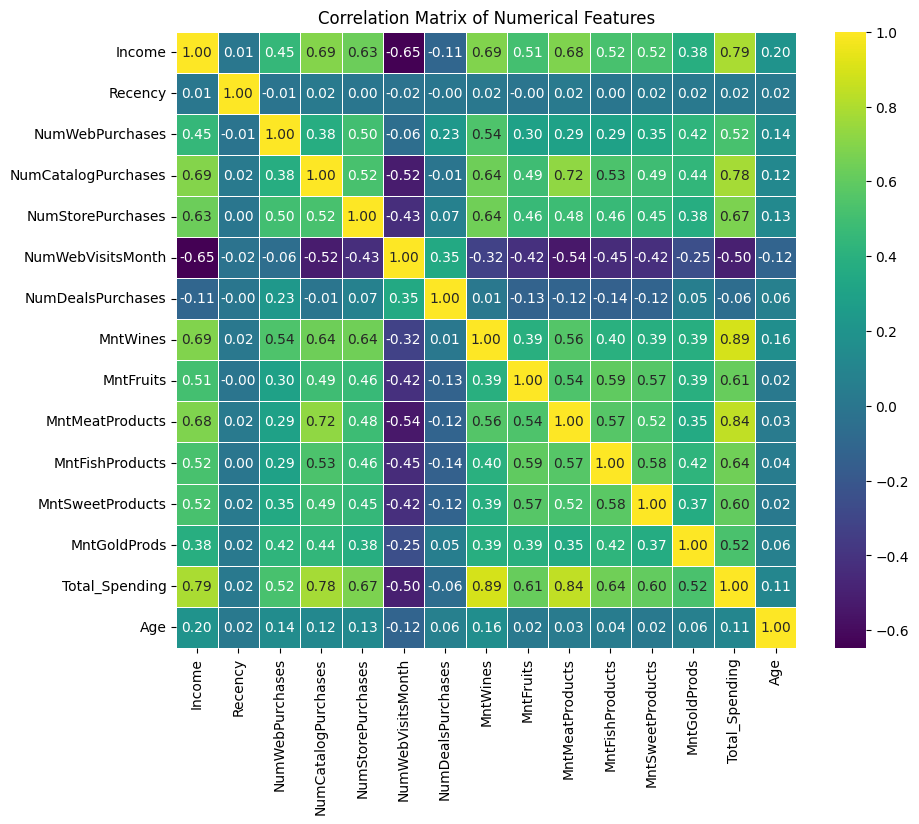

In [34]:
# Calculating the correlation matrix
corr_matrix = df[continuous_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Observations:
* Income and Total_Spending have a strong positive correlation of 0.79.

* NumCatalogPurchases and Total_Spending show a strong positive correlation of 0.78.

* NumStorePurchases and Total_Spending have a notable positive correlation of 0.67.

* Income and NumWebVisitsMonth are negatively correlated at -0.65.

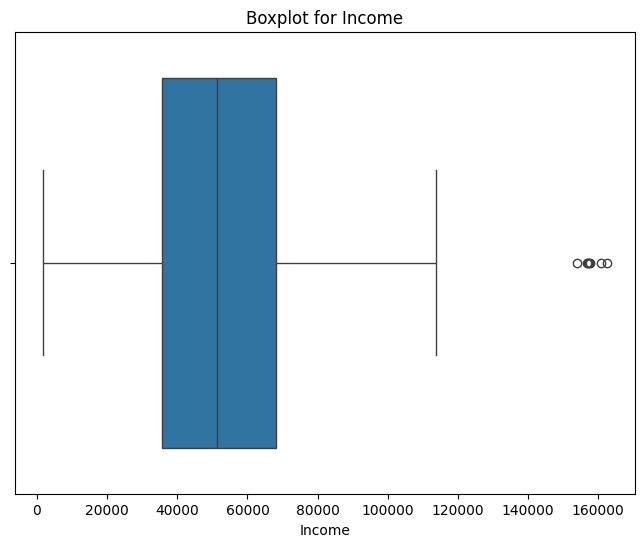

There are 7 outliers in the 'Income' column

----------------------------------------------------------------------


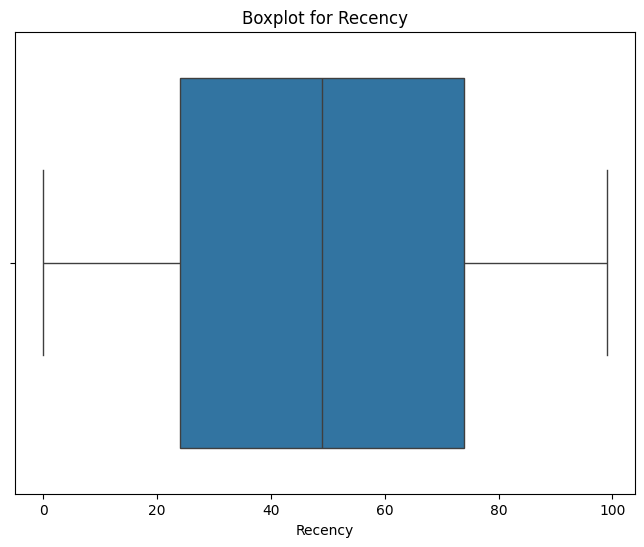

There are 0 outliers in the 'Recency' column

----------------------------------------------------------------------


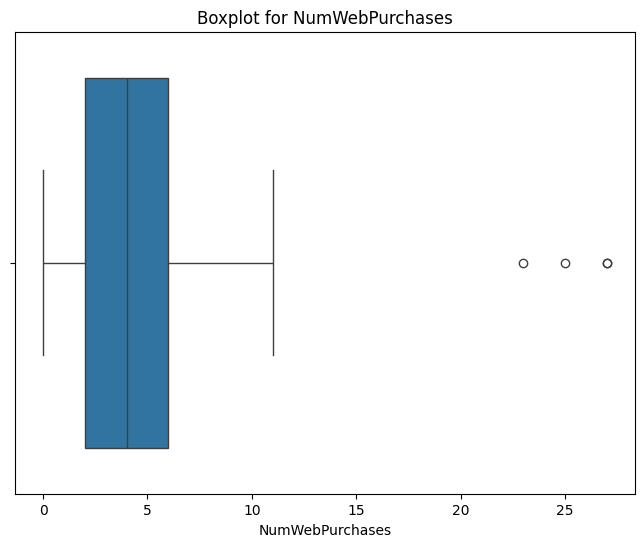

There are 4 outliers in the 'NumWebPurchases' column

----------------------------------------------------------------------


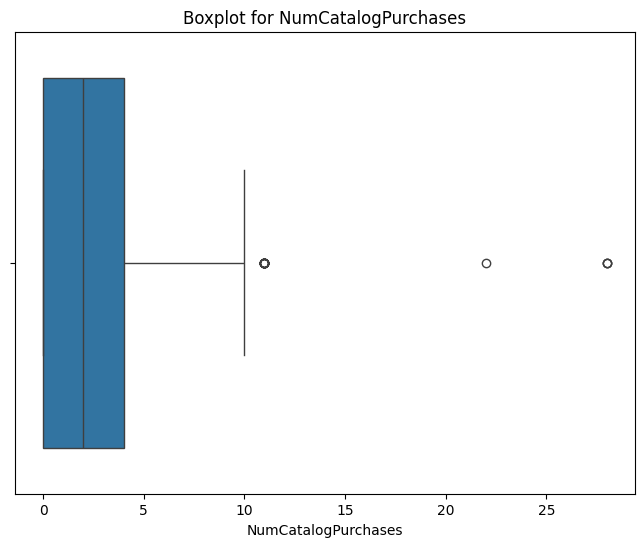

There are 23 outliers in the 'NumCatalogPurchases' column

----------------------------------------------------------------------


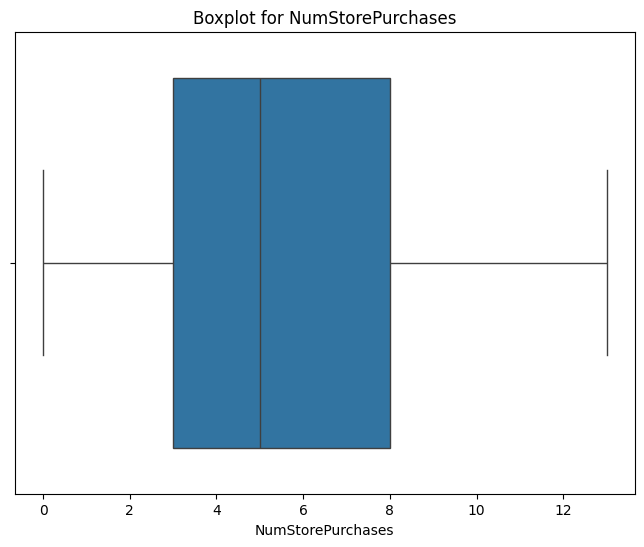

There are 0 outliers in the 'NumStorePurchases' column

----------------------------------------------------------------------


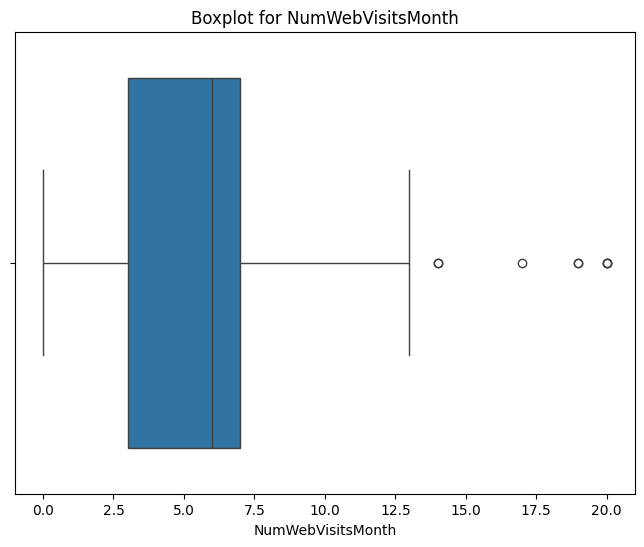

There are 8 outliers in the 'NumWebVisitsMonth' column

----------------------------------------------------------------------


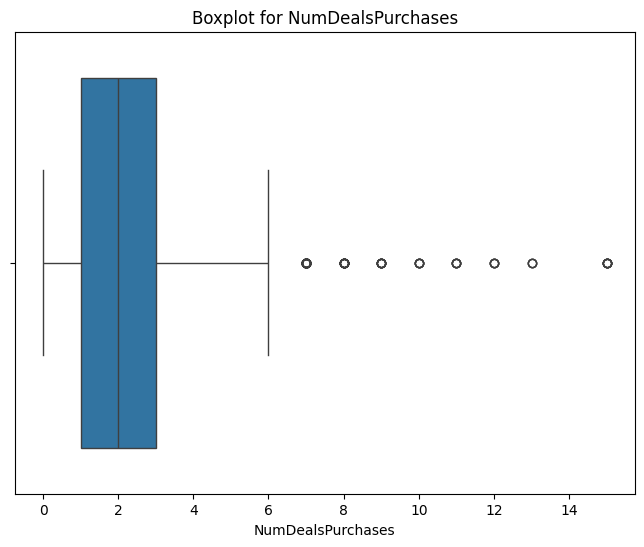

There are 86 outliers in the 'NumDealsPurchases' column

----------------------------------------------------------------------


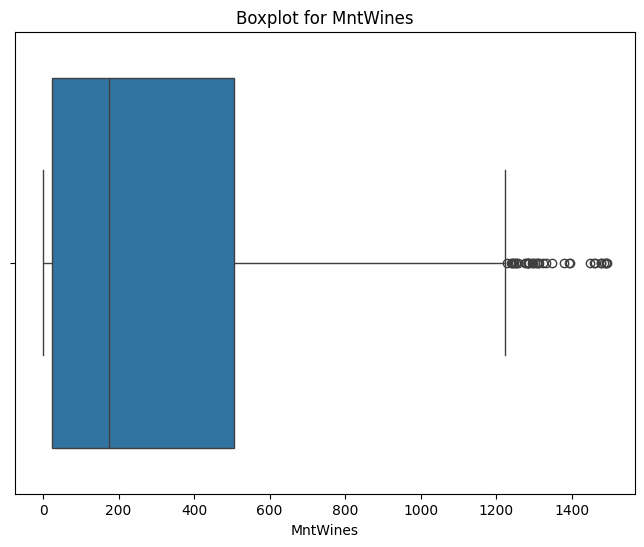

There are 35 outliers in the 'MntWines' column

----------------------------------------------------------------------


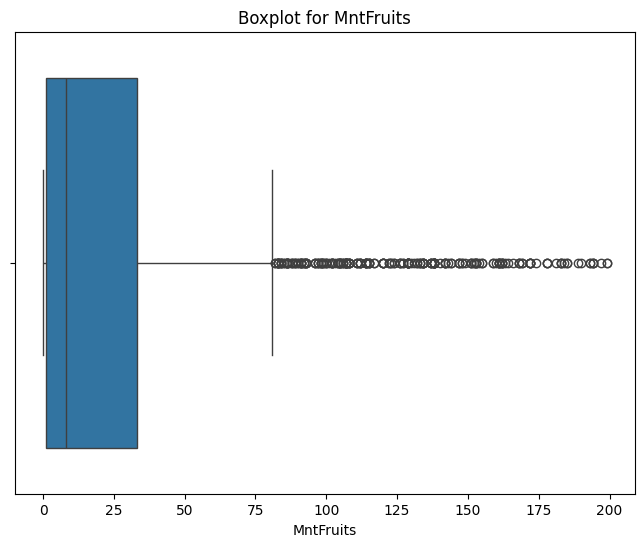

There are 227 outliers in the 'MntFruits' column

----------------------------------------------------------------------


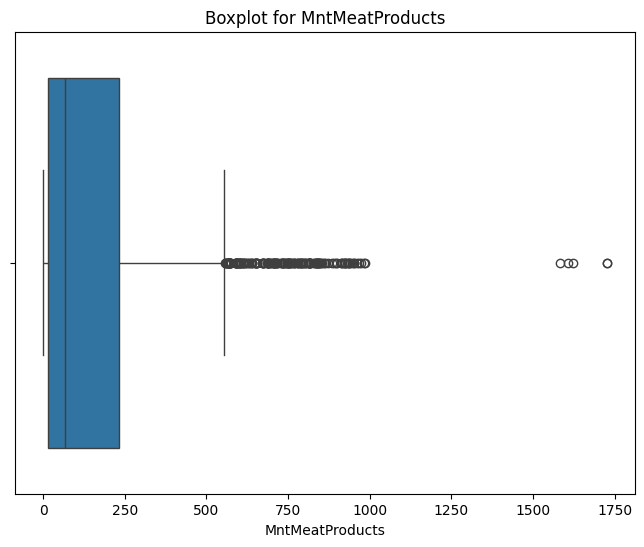

There are 175 outliers in the 'MntMeatProducts' column

----------------------------------------------------------------------


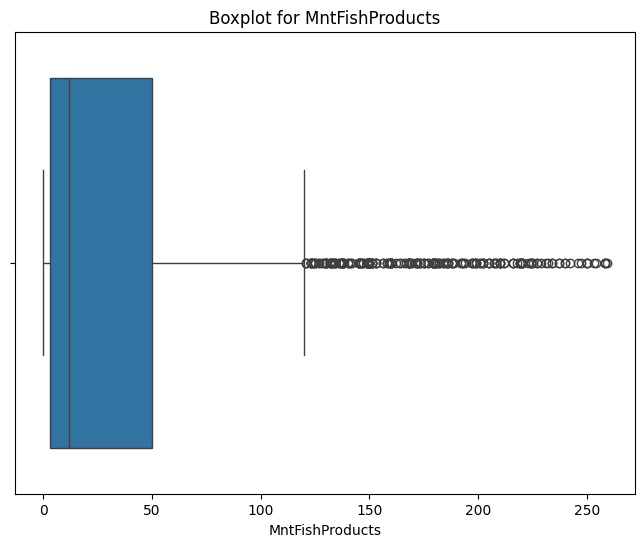

There are 223 outliers in the 'MntFishProducts' column

----------------------------------------------------------------------


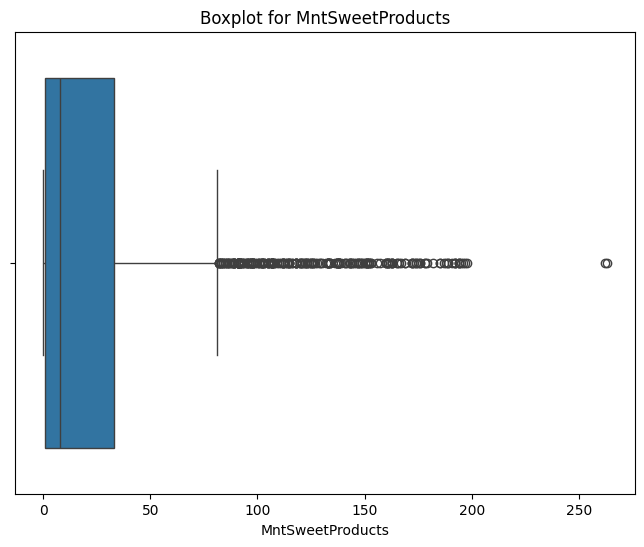

There are 248 outliers in the 'MntSweetProducts' column

----------------------------------------------------------------------


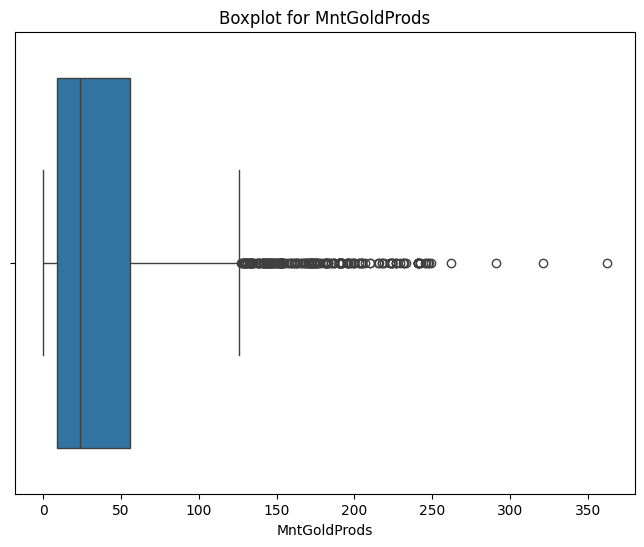

There are 207 outliers in the 'MntGoldProds' column

----------------------------------------------------------------------


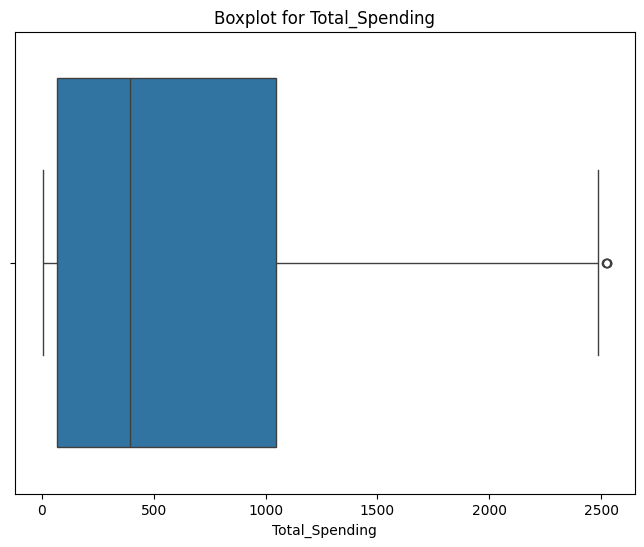

There are 3 outliers in the 'Total_Spending' column

----------------------------------------------------------------------


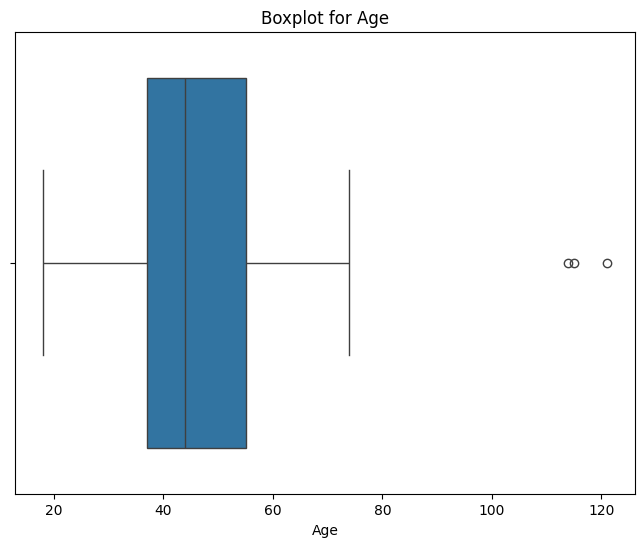

There are 3 outliers in the 'Age' column

----------------------------------------------------------------------


In [35]:
# Checking for outliers in each numerical column

# Initialize an empty DataFrame to store outlier details
df_outliers = pd.DataFrame(columns=['Column', 'Outlier Count', 'Outlier Percentage'])

# Checking for outliers in each numerical column
for col in continuous_columns:
    # Boxplot for each column
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

    # Computing IQR for each column
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    IQR = q3 - q1
    upper_limit = q3 + (1.5 * IQR)
    lower_limit = q1 - (1.5 * IQR)

    '''
    The values less than the lower limit and the values greater
    than the upper limit are considered outliers
    '''
    outliers_of_col = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    k = len(outliers_of_col)
    total_count = len(df)

    # Creating a DataFrame with outlier information for this column
    outlier_info = pd.DataFrame({
        'Column': [col],
        'Outlier Count': [k],
        'Outlier Percentage': [(k / total_count) * 100]
    })

    # Concatenating the current outlier info with the overall DataFrame
    df_outliers = pd.concat([df_outliers, outlier_info], ignore_index=True)

    print(f"There are {k} outliers in the '{col}' column")
    print()
    print("-------" * 10)

In [36]:
# Outlier percentages for each numerical column
df_outliers

,Column,Outlier Count,Outlier Percentage
0,Income,7,0.312640
1,Recency,0,0.000000
2,NumWebPurchases,4,0.178651
3,NumCatalogPurchases,23,1.027244
4,NumStorePurchases,0,0.000000
5,NumWebVisitsMonth,8,0.357302
6,NumDealsPurchases,86,3.841000
7,MntWines,35,1.563198
8,MntFruits,227,10.138455
9,MntMeatProducts,175,7.815989


Observation: Outlier percentages are very small in most columns, indicating that extreme values are rare. For columns with higher outlier percentages, such as MntFruits and MntSweetProducts, the outliers correspond to high spending amounts. Since overall spending has only 0.13% outliers, we will not remove outliers from the dataset

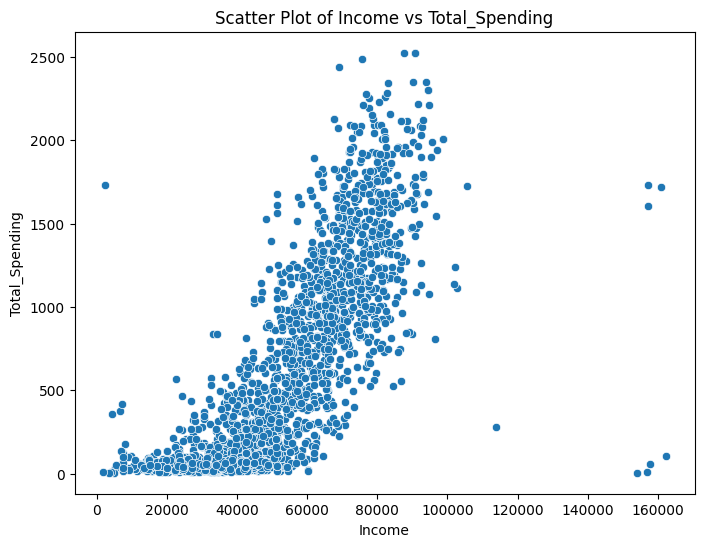

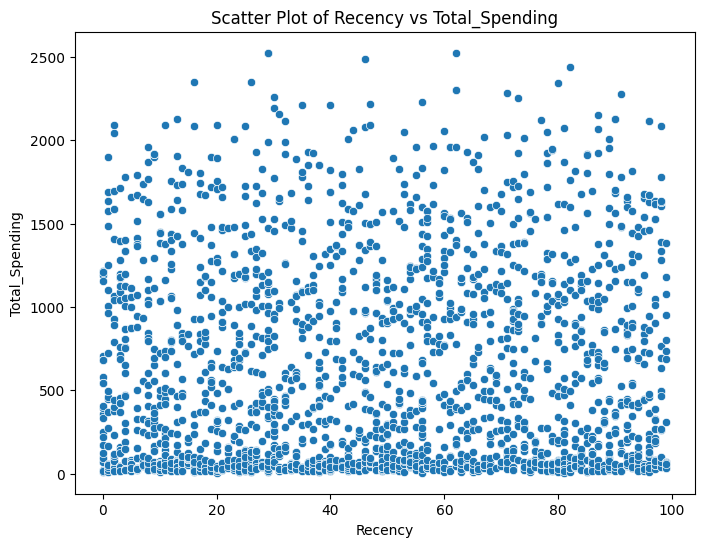

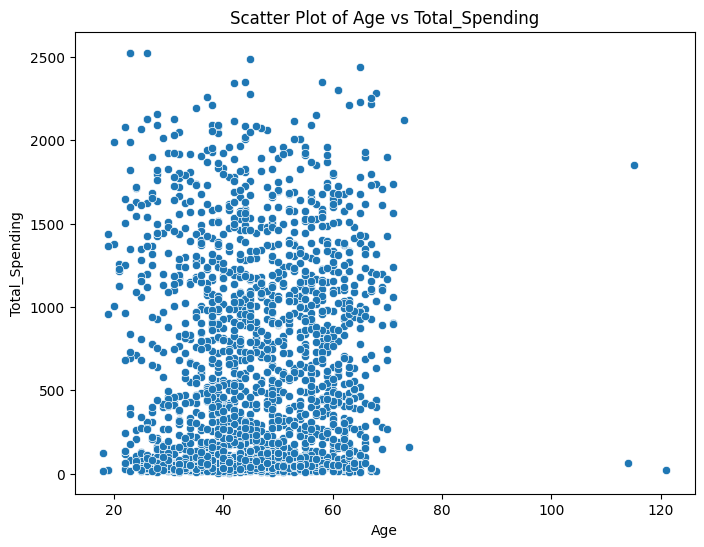

In [37]:
# Scatter plots for selected pairs of continuous variables

pairs_to_plot = [('Income', 'Total_Spending'),
                 ('Recency', 'Total_Spending'),
                 ('Age', 'Total_Spending')]

for pair in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()



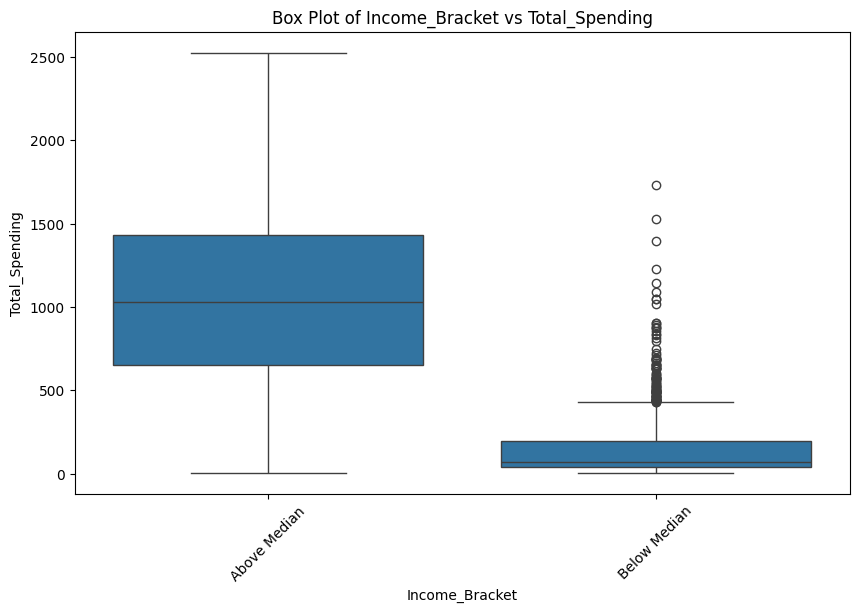

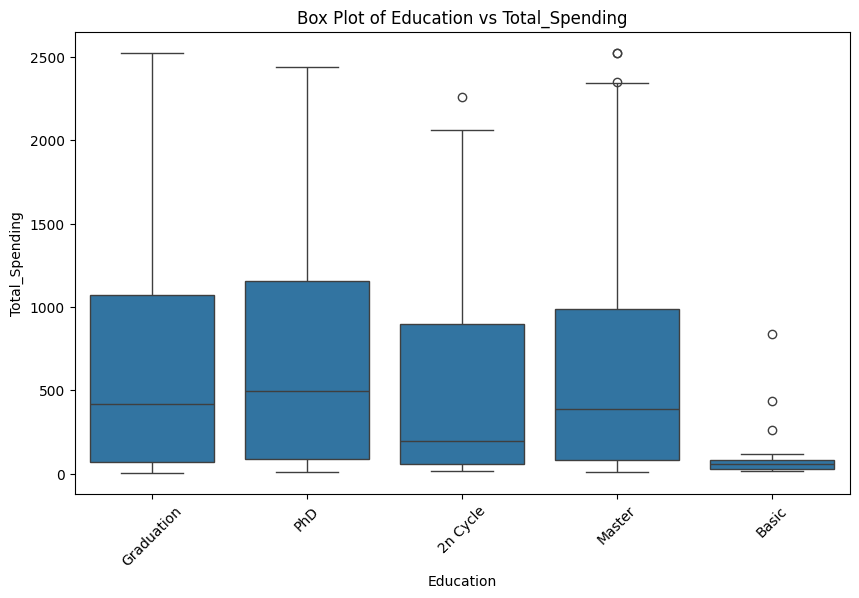

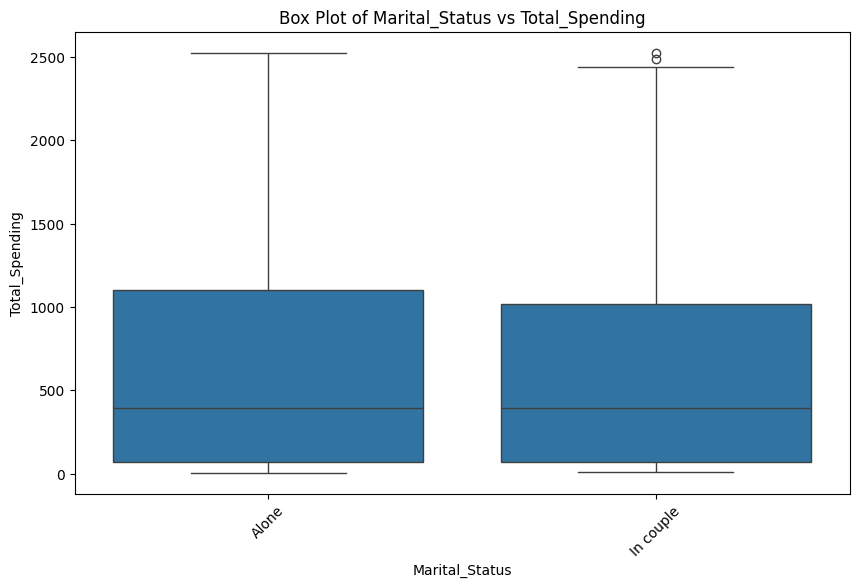

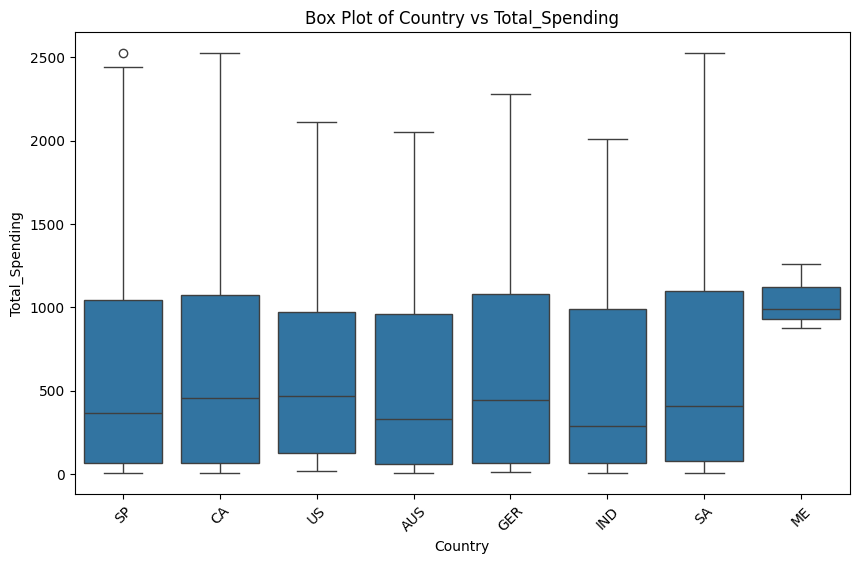

In [38]:
# List of categorical columns to plot against 'Total_Spending'
categorical_columns_to_plot = ['Income_Bracket','Education', 'Marital_Status', 'Country']

for cat_col in categorical_columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=cat_col, y='Total_Spending')
    plt.title(f'Box Plot of {cat_col} vs Total_Spending')
    plt.xlabel(cat_col)
    plt.ylabel('Total_Spending')
    plt.xticks(rotation=45)
    plt.show()

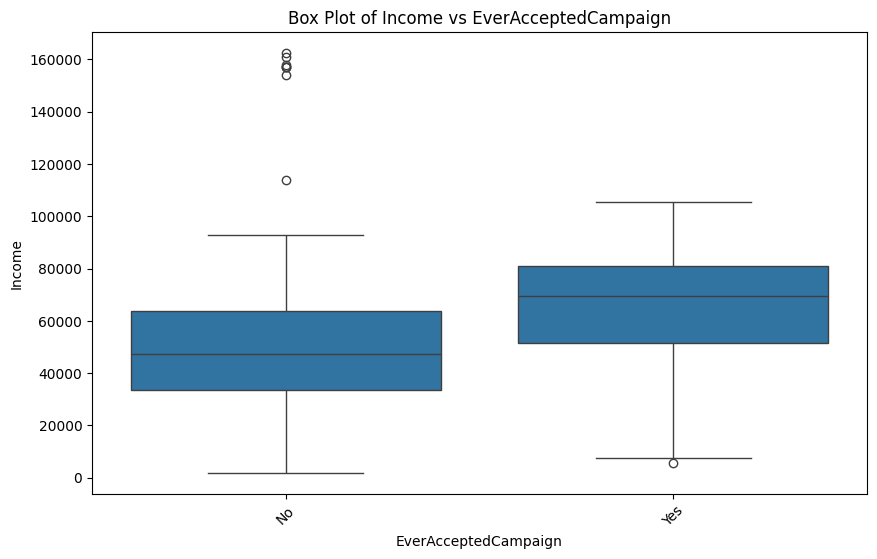

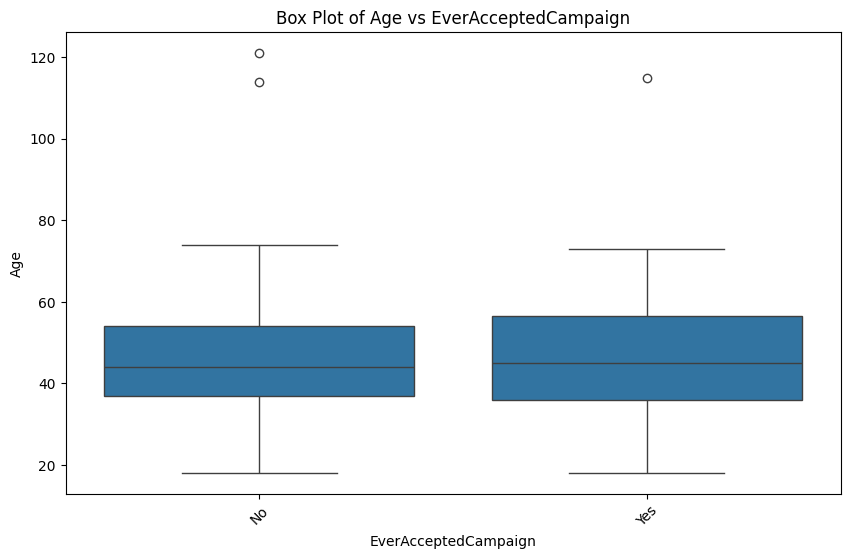

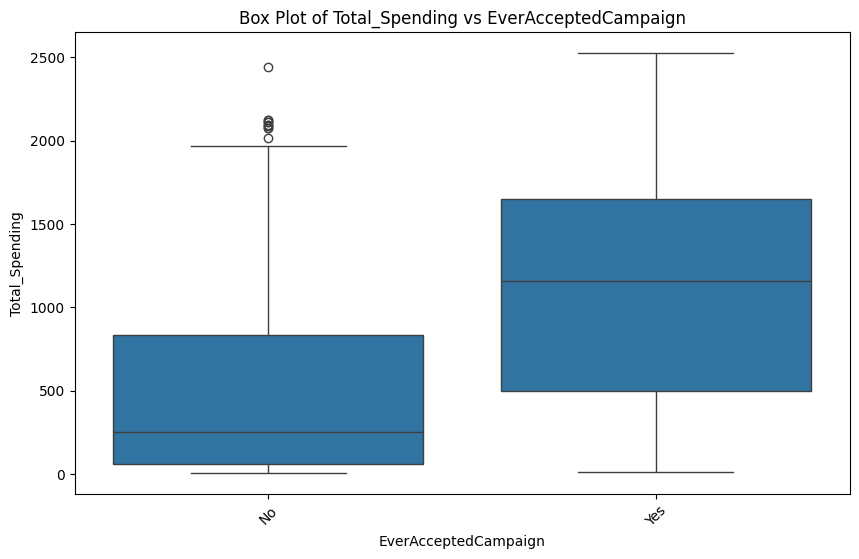

In [39]:
# List of columns to plot against 'EverAcceptedCampaign'
columns_to_plot = ['Income', 'Age', 'Total_Spending']

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='EverAcceptedCampaign', y=col)
    plt.title(f'Box Plot of {col} vs EverAcceptedCampaign')
    plt.xlabel('EverAcceptedCampaign')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()


# Hypothesis Testing

Is income of customers dependent on their education

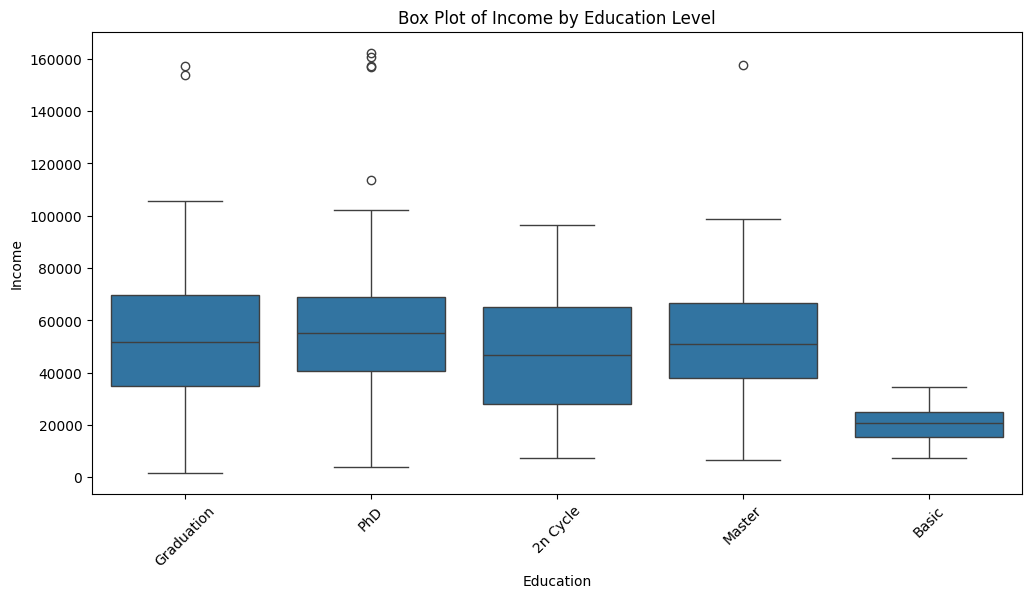


Mean Income by Education Level:
Education
2n Cycle      47688.458128
Basic         20306.259259
Graduation    52161.966252
Master        52896.662162
PhD           56096.216049
Name: Income, dtype: float64


In [40]:
# Box Plot of Income by Education Level
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Education', y='Income')
plt.title('Box Plot of Income by Education Level')
plt.xlabel('Education')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# Calculating mean income for each education level
mean_income_by_education = df.groupby('Education')['Income'].mean()

print("\nMean Income by Education Level:")
print(mean_income_by_education)

Observation: Individuals with a PhD have the highest mean income at USD 56,096, whereas those with only Basic education have the lowest mean income at USD 20,306.





In [41]:
# Hypothesis Testing

from scipy.stats import f_oneway

# Null Hypothesis (H0): Income is independent of education level.
# Alternative Hypothesis (H1): Income is dependent on education level.

# Performing ANOVA to test if income means are the same across education levels
education_income_groups = [df[df['Education'] == level]['Income'] for level in df['Education'].unique()]
anova_result = f_oneway(*education_income_groups)

print('ANOVA result for Income vs Education:')
print('p-value:', anova_result.pvalue)

# Interpretation
alpha = 0.05  # Significance level
if anova_result.pvalue < alpha:
    print('Reject the null hypothesis: There is a significant difference in income across education levels.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in income across education levels.')


ANOVA result for Income vs Education:
p-value: 2.284759346684198e-31
Reject the null hypothesis: There is a significant difference in income across education levels.


Do Higher Income People Spend More?

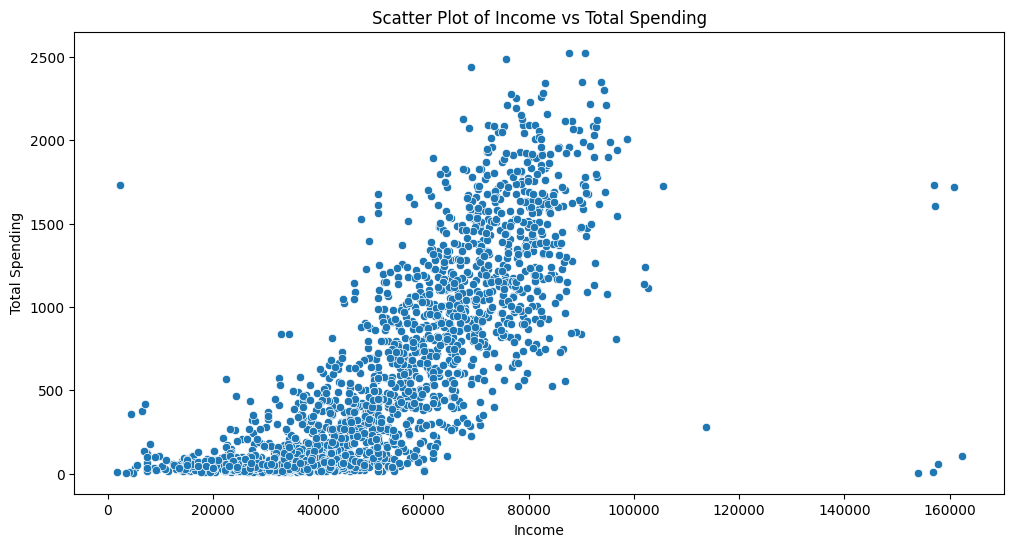


Correlation between Income and Total Spending: 0.79


In [42]:
# Scatter Plot of Income vs Total Spending
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spending')
plt.title('Scatter Plot of Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

# Calculating correlation between income and total spending
correlation = df[['Income', 'Total_Spending']].corr().iloc[0, 1]
print(f'\nCorrelation between Income and Total Spending: {correlation:.2f}')

In [43]:
# Hypothesis Test

from scipy.stats import pearsonr

# Null Hypothesis (H0): There is no relationship between income and total spending.
# Alternative Hypothesis (H1): Higher income is associated with higher total spending.

# Calculating the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(df['Income'], df['Total_Spending'])

print('Pearson correlation coefficient:', correlation_coefficient)
print('p-value:', p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: Higher income is associated with higher total spending.')
else:
    print('Fail to reject the null hypothesis: There is no significant association between income and total spending.')


Pearson correlation coefficient: 0.7892965285975342
p-value: 0.0
Reject the null hypothesis: Higher income is associated with higher total spending.


Do Couples Spend More or Less Money on Wine Than People Living Alone?

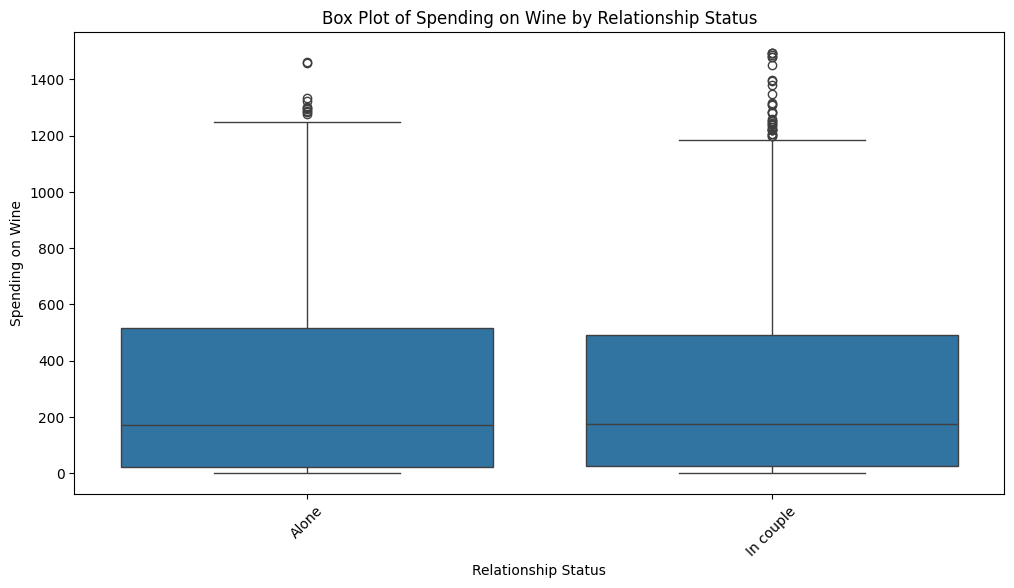


Mean Spending on Wine by Relationship Status:
Marital_Status
Alone        306.665829
In couple    302.634096
Name: MntWines, dtype: float64


In [44]:
# Box Plot of Spending on Wine by Relationship Status

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Marital_Status', y='MntWines')
plt.title('Box Plot of Spending on Wine by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Spending on Wine')
plt.xticks(rotation=45)
plt.show()

# Calculating mean spending on wine for each relationship status
mean_spending_by_relationship = df.groupby('Marital_Status')['MntWines'].mean()

print("\nMean Spending on Wine by Relationship Status:")
print(mean_spending_by_relationship)

In [45]:
# Hypothesis test

from scipy.stats import ttest_ind

# Null Hypothesis (H0): Spending on wine is the same for people in couples and people living alone.
# Alternative Hypothesis (H1): Spending on wine differs between people in couples and people living alone.

# Separate the data based on relationship status
couples_wine = df[df['Marital_Status'] == 'In couple']['MntWines']
alone_wine = df[df['Marital_Status'] == 'Alone']['MntWines']

# Perform t-test
t_statistic, p_value = ttest_ind(couples_wine, alone_wine, equal_var=False)

print('p-value:', p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: Spending on wine differs between people in couples and people living alone.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in spending on wine between people in couples and people living alone.')


p-value: 0.7863223090103292
Fail to reject the null hypothesis: There is no significant difference in spending on wine between people in couples and people living alone.


Are People with Lower Income More Attracted Towards Campaigns?

<Figure size 1200x600 with 0 Axes>

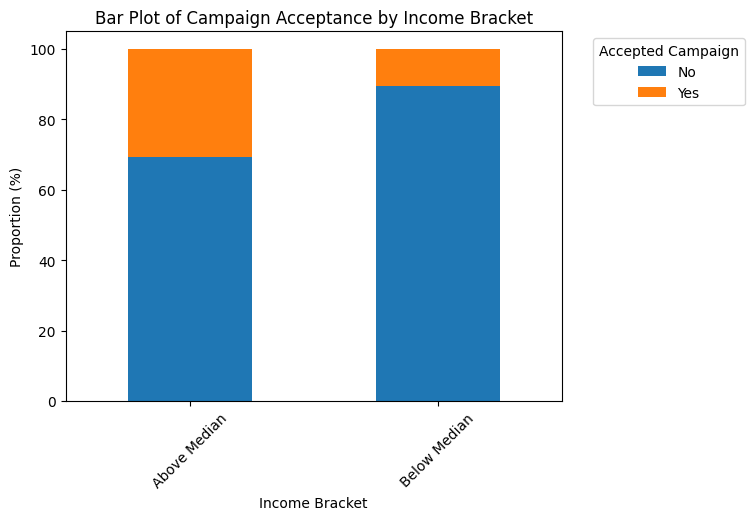


Proportion of Campaign Acceptance by Income Bracket:
                       No        Yes
Income_Bracket                      
Above Median    69.257951  30.742049
Below Median    89.611563  10.388437


In [46]:
# Calculating proportions of campaign acceptance by income bracket
campaign_acceptance_by_income = df.groupby('Income_Bracket')['EverAcceptedCampaign'].value_counts(normalize=True).unstack().fillna(0)
campaign_acceptance_by_income.columns = ['No', 'Yes']
campaign_acceptance_by_income = campaign_acceptance_by_income * 100

# Bar Plot of Campaign Acceptance by Income Bracket
plt.figure(figsize=(12, 6))
campaign_acceptance_by_income.plot(kind='bar', stacked=True)
plt.title('Bar Plot of Campaign Acceptance by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.legend(title='Accepted Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

print("\nProportion of Campaign Acceptance by Income Bracket:")
print(campaign_acceptance_by_income)

In [47]:
# Hypothesis Test

from scipy.stats import chi2_contingency

# Null Hypothesis (H0): Campaign acceptance is independent of income bracket.
# Alternative Hypothesis (H1): Campaign acceptance is dependent on income bracket.

# Creating contingency table
contingency_table = pd.crosstab(df['Income_Bracket'], df['EverAcceptedCampaign'])

# Performing Chi-Square test
chi2_statistic, p_value, _, _ = chi2_contingency(contingency_table)

print(contingency_table)
print()
print('p-value:', p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: Campaign acceptance is dependent on income bracket.')
else:
    print('Fail to reject the null hypothesis: There is no significant association between campaign acceptance and income bracket.')


EverAcceptedCampaign   No  Yes
Income_Bracket                
Above Median          784  348
Below Median          992  115

p-value: 2.5115657237830455e-32
Reject the null hypothesis: Campaign acceptance is dependent on income bracket.


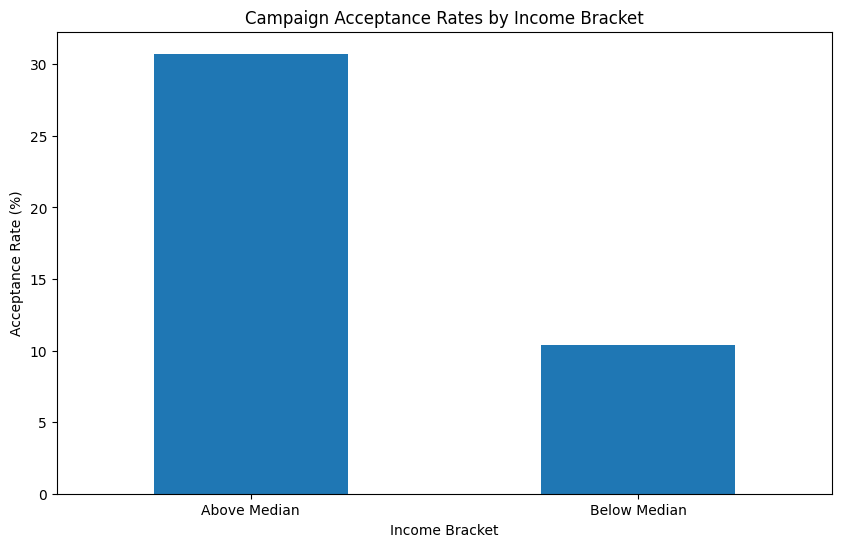

Campaign Acceptance Rates by Income Bracket (%):
Income_Bracket
Above Median    30.742049
Below Median    10.388437
Name: AcceptedCampaignNumeric, dtype: float64


In [48]:
# Converting 'EverAcceptedCampaign' to numerical values (0 for 'No', 1 for 'Yes')
df['AcceptedCampaignNumeric'] = df['EverAcceptedCampaign'].apply(lambda x: 1 if x == 'Yes' else 0)



# Calculating acceptance rates
acceptance_rates = df.groupby('Income_Bracket')['AcceptedCampaignNumeric'].mean() * 100

# Creating a bar chart to visualize the acceptance rates
plt.figure(figsize=(10, 6))
acceptance_rates.plot(kind='bar')
plt.title('Campaign Acceptance Rates by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=0)
plt.show()


print("Campaign Acceptance Rates by Income Bracket (%):")
print(acceptance_rates)

Observation: Customers in the 'Above Median' income bracket have a significantly higher campaign acceptance rate of 30.74%, compared to the 10.39% acceptance rate for those in the 'Below Median' income bracket

Campaign Acceptance and Customer Age

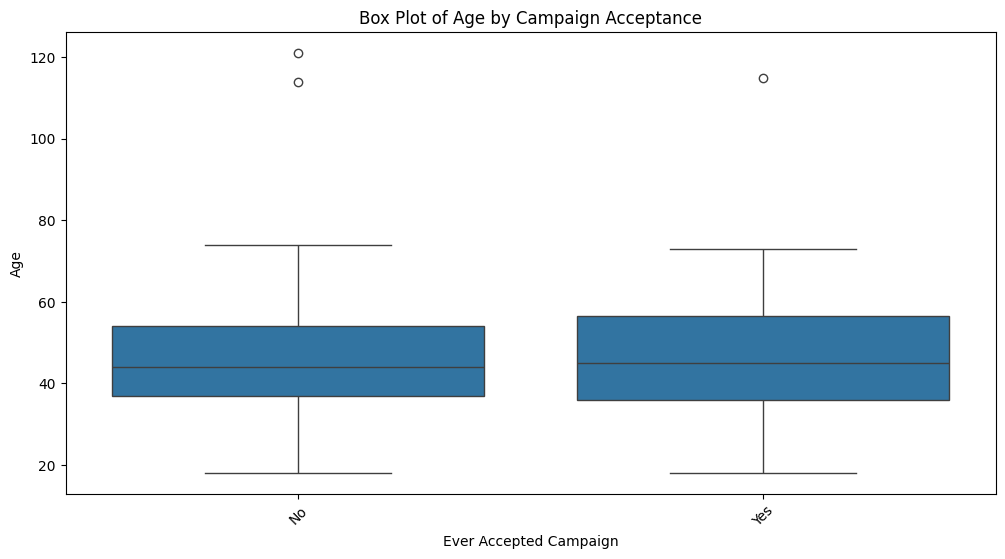


Mean Age by Campaign Acceptance:
EverAcceptedCampaign
No     45.009572
Yes    45.920086
Name: Age, dtype: float64


In [49]:
# Scatter Plot of Campaign Acceptance vs Age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EverAcceptedCampaign', y='Age')
plt.title('Box Plot of Age by Campaign Acceptance')
plt.xlabel('Ever Accepted Campaign')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Calculating mean age for campaign acceptance and non-acceptance
mean_age_by_campaign = df.groupby('EverAcceptedCampaign')['Age'].mean()

print("\nMean Age by Campaign Acceptance:")
print(mean_age_by_campaign)



In [50]:
# Hypothesis Test

from scipy.stats import ttest_ind

# Null Hypothesis (H0): Age is the same for customers who accepted and did not accept campaigns.
# Alternative Hypothesis (H1): Age differs between customers who accepted and did not accept campaigns.

# Splitting data into two groups
accepted_age = df[df['EverAcceptedCampaign'] == 'Yes']['Age']
not_accepted_age = df[df['EverAcceptedCampaign'] == 'No']['Age']

# Performing T-test
t_statistic, p_value = ttest_ind(accepted_age, not_accepted_age, equal_var=False)  # Welch's T-test

print(f'p-value: {p_value:.4f}')

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in age between customers who accepted and did not accept campaigns.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in age between customers who accepted and did not accept campaigns.')


p-value: 0.1708
Fail to reject the null hypothesis: There is no significant difference in age between customers who accepted and did not accept campaigns.


# Key Insights:

* Approximately 79% of customers have not accepted the campaign, while 21% have.

* The median income is USD 51,373. About 50.56% of customers are in the 'Above Median' income bracket, and 49.44% are in the 'Below Median' bracket, indicating a nearly even split between the two.

* The median total spending is 396. Higher income is positively correlated with higher total spending (correlation of 0.79).

* There is no significant difference in spending on wine between people in couples and those living alone.

* Individuals with a PhD have the highest mean income at USD 56,096, while those with only Basic education have the lowest mean income at USD 20,306. There is a significant difference in income across education levels.

* Campaign acceptance is dependent on income bracket. Customers in the 'Above Median' income bracket have a significantly higher campaign acceptance rate of 30.74% compared to 10.39% for those in the 'Below Median' bracket.




# Recommendations:

* Focus marketing efforts on customers in the 'Above Median' income bracket, as they show a significantly higher campaign acceptance rate.

* Leverage the strong correlation between income and total spending to tailor promotional offers and product recommendations based on income levels.

* Consider developing educational content or special offers for customers with lower educational backgrounds to bridge income gaps and potentially improve their spending.

* Since there's no significant difference in wine spending between couples and singles, ensure that wine-related promotions are inclusive and appealing to both demographics.
